In [32]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

In [33]:
def parse_output_file(filepath):
    data = []
    with open(filepath, 'r') as file:
        content = file.read()
        sections = content.split("-------------------------------------------------------------")
        for section in sections:
            if "Processing" in section:
                match = re.search(r"Processing .+graph_(\d+)_nodes\.txt.+\n(?:Starting solver for \d+ cities and \d+ routes\.\.\.\n)?Lower cost: (\d+).*Time taken: (\d+)\s(\w+)", section, re.DOTALL)
                if match:
                    cities = int(match.group(1))
                    cost = int(match.group(2))
                    time_taken = int(match.group(3))
                    time_unit = match.group(4)
                    if time_unit == "milliseconds":
                        time_taken *= 1e6  # convert to nanoseconds
                    data.append({"cities": cities, "cost": cost, "time_taken_ns": time_taken})
    return pd.DataFrame(data)



In [34]:
def aggregate_results(folder_map):
    all_data = []
    for folder, strategy in folder_map.items():
        for filename in os.listdir(folder):
            if filename.endswith(".out") or filename == "results.txt":
                filepath = os.path.join(folder, filename)
                df = parse_output_file(filepath)
                df['strategy'] = strategy
                all_data.append(df)
    return pd.concat(all_data, ignore_index=True)

In [35]:
def plot_results(df):
    sns.set(style="whitegrid")

    # Check if the time taken is too large and convert to seconds if necessary
    max_time_ns = df['time_taken_ns'].max()
    if max_time_ns > 1e9:
        df['time_taken_s'] = df['time_taken_ns'] / 1e9
        time_column = 'time_taken_s'
        time_label = 'Time Taken (seconds)'
    else:
        time_column = 'time_taken_ns'
        time_label = 'Time Taken (nano seconds)'

    # Plot time taken vs. number of cities
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='cities', y=time_column, data=df, marker='o')
    plt.xlabel('Number of Cities')
    plt.ylabel(time_label)
    plt.title('Time Taken vs. Number of Cities')
    plt.show()

    # Plot lower cost vs. number of cities
    plt.figure(figsize=(10, 6))
    sns.barplot(x='cities', y='cost', data=df)
    plt.xlabel('Number of Cities')
    plt.ylabel('Lower Cost')
    plt.title('Lower Cost vs. Number of Cities')
    plt.show()


In [36]:
def plot_combined_results(df):
    sns.set(style="whitegrid")

    # Check if the time taken is too large and convert to seconds if necessary
    max_time_ns = df['time_taken_ns'].max()
    if max_time_ns > 1e9:
        df['time_taken_s'] = df['time_taken_ns'] / 1e9
        time_column = 'time_taken_s'
        time_label = 'Time Taken (s)'
    else:
        time_column = 'time_taken_ns'
        time_label = 'Time Taken (ns)'

    # Plot time taken vs. number of cities for each strategy
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='cities', y=time_column, hue='strategy', data=df, marker='o')
    plt.xlabel('Number of Cities')
    plt.ylabel(time_label)
    plt.title('Time Taken vs. Number of Cities by Strategy')
    plt.legend(title='Strategy')
    plt.show()

    # Plot lower cost vs. number of cities for each strategy
    plt.figure(figsize=(10, 6))
    sns.barplot(x='cities', y='cost', hue='strategy', data=df)
    plt.xlabel('Number of Cities')
    plt.ylabel('Lower Cost')
    plt.title('Lower Cost vs. Number of Cities by Strategy')
    plt.legend(title='Strategy')
    plt.show()


In [37]:
def plot_aggregated_results(df):
    sns.set(style="whitegrid")

    # Check if the time taken is too large and convert to seconds if necessary
    max_time_ns = df['time_taken_ns'].max()
    if max_time_ns > 1e9:
        df['time_taken_s'] = df['time_taken_ns'] / 1e9
        time_column = 'time_taken_s'
        time_label = 'Time Taken (s)'
    else:
        time_column = 'time_taken_ns'
        time_label = 'Time Taken (ns)'

    # Plot time taken vs. number of cities for different strategies
    plt.figure(figsize=(12, 8))
    sns.lineplot(x='cities', y=time_column, hue='strategy', data=df, marker='o')
    plt.xlabel('Number of Cities')
    plt.ylabel(time_label)
    plt.title('Time Taken vs. Number of Cities by Strategy')
    plt.savefig(f"aggregated_results_{pd.Timestamp.now().strftime('%Y%m%d%H%M%S')}.png")
    plt.show()

In [38]:
def plot_aggregated_results_log(df):
    sns.set(style="whitegrid")

    # Check if the time taken is too large and convert to seconds if necessary
    max_time_ns = df['time_taken_ns'].max()
    if max_time_ns > 1e9:
        df['time_taken_s'] = df['time_taken_ns'] / 1e9
        time_column = 'time_taken_s'
        time_label = 'Time Taken (s)'
    else:
        time_column = 'time_taken_ns'
        time_label = 'Time Taken (ns)'

    # Plot time taken vs. number of cities for different strategies
    plt.figure(figsize=(12, 8))
    sns.lineplot(x='cities', y=time_column, hue='strategy', data=df, marker='o')
    plt.xlabel('Number of Cities')
    plt.ylabel(time_label)
    plt.yscale('log')  # Set y-axis to logarithmic scale
    plt.title('Time Taken vs. Number of Cities by Strategy')
    plt.legend(title='Strategy')
    plt.savefig(f"aggregated_results_log_{pd.Timestamp.now().strftime('%Y%m%d%H%M%S')}.png")
    plt.show()

In [39]:
folder_strategy_map = {
    'global-search': 'Global Search ',
    'global-search-omp': 'Global Search OMP',
    'global-search-mpi': 'Global Search MPI',
    'local-search': 'Local Search',
    'local-search-omp': 'Local Search OMP',
    'local-search-mpi': 'Local Search MPI',
}

all_results_df = aggregate_results(folder_strategy_map)


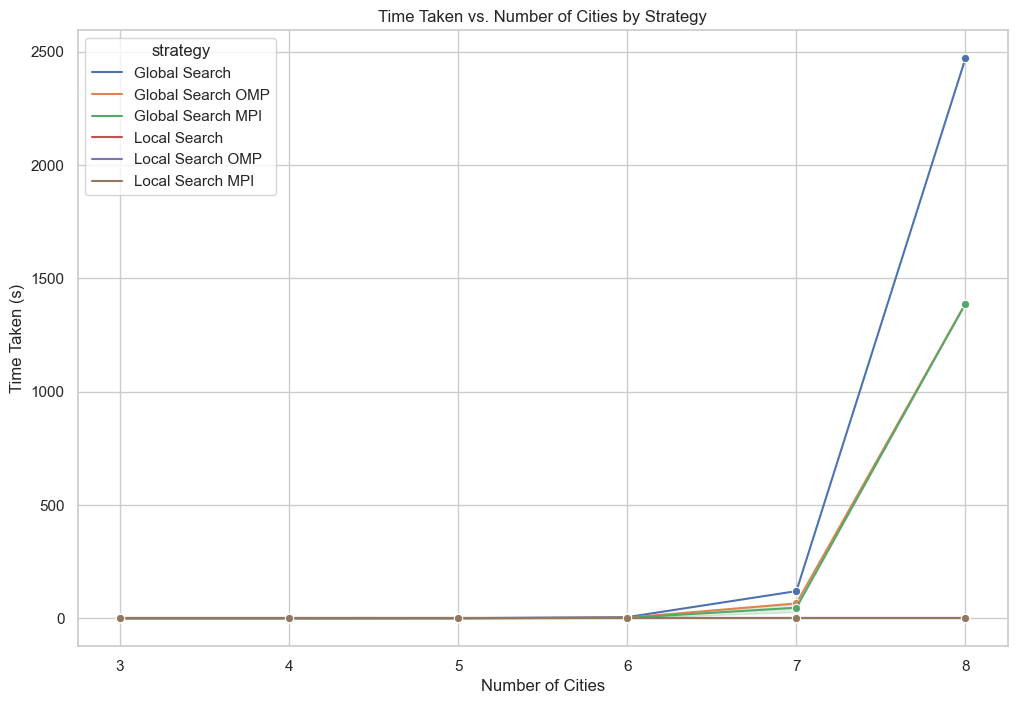

In [40]:
plot_aggregated_results(all_results_df)


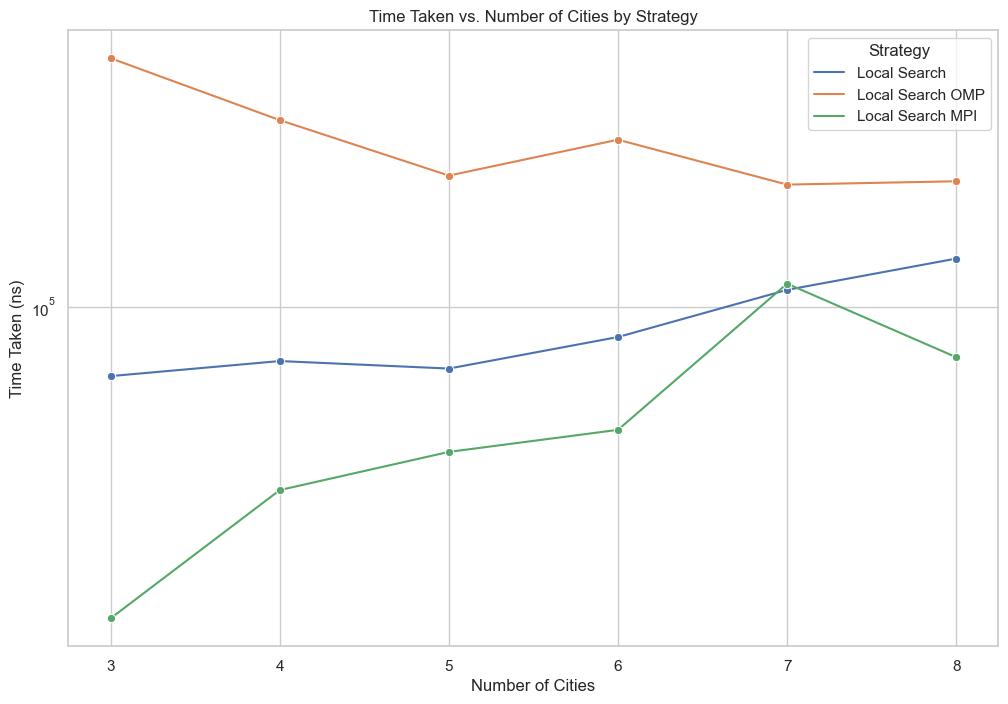

In [41]:
folder_strategy_map = {
    'local-search': 'Local Search',
    'local-search-omp': 'Local Search OMP',
    'local-search-mpi': 'Local Search MPI',
}

local_results_df = aggregate_results(folder_strategy_map)
plot_aggregated_results_log(local_results_df)
